In [1]:
from utilities import *
from preprocessing import * 
import pandas as pd

lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

clips =fcs.get_audio_files(libri_train)
print(len(clips))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
min_duration=hop_length*10
min_voiced_duration_ms = 50 
energy_threshold = 0.05

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


28539


In [2]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = (xx - h) // 2
    aa = xx - a - h
    b = (yy - w) // 2
    bb = yy - b - w
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')


In [3]:
#file = os.open("clipsdump.npy",os.O_WRONLY)
#print(file)

#os.close(file)
#file.close

In [4]:
with open("known_clips.npy", 'rb') as f:
    known_clips= np.load(f,allow_pickle=True)

    #testRetreive = np.load("clipsdump.npy")
with open("exact.npy", 'rb') as f:
    exact= np.load(f,allow_pickle=True)

(277920,) [[  7470  11340]
 [ 11610  14040]
 [ 19170  29430]
 [ 30510  33480]
 [ 38430  39330]
 [ 40680  42750]
 [ 44640  47070]
 [ 60210  61380]
 [ 61560  63540]
 [ 63990  76320]
 [ 76590  81900]
 [ 82620  89640]
 [103860 105030]
 [107280 108360]
 [110790 117540]
 [120960 127800]
 [146070 147600]
 [154890 155880]
 [156240 167400]
 [167670 173520]
 [174150 181620]
 [191880 192870]
 [194040 202140]
 [202320 219150]
 [220050 223830]
 [224910 225810]
 [248940 263070]
 [263700 270180]
 [270990 274950]
 [275850 277560]]

 TAKE IT TO YOUR MASTER MADAME WILL AWAIT MY RETURN YES GO THE CONCIERGE CLOSED THE DOOR LEAVING MADAME DANGLARS IN THE STREET SHE HAD NOT LONG TO WAIT 
 ['t', 'e', 'ɪ', 'k', 'ɪ', 't', 't', 'uː', 'j', 'ɔː', 'm', 'ɑː', 's', 't', 'ɐ', 'm', 'æ', 'd', 'ə', 'm', 'w', 'ɪ', 'l', 'ɐ', 'w', 'e', 'ɪ', 't', 'm', 'a', 'ɪ', 'ɹ', 'i', 't', 'ɝ', 'n', 'j', 'ɛ', 's', 'ɡ', 'ə', 'ʊ', 'ð', 'ə', 'k', 'ˌ', 'ɒ', 'n', 's', 'ɪ', 'e', 'ə', 'ʒ', 'k', 'l', 'ə', 'ʊ', 'z', 'd', 'ð', 'ə', 'd', 'ɔː', 'l',

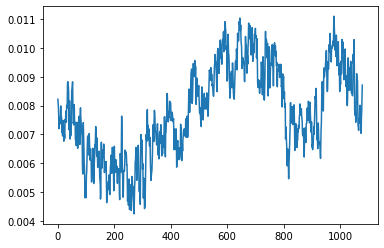

In [5]:
sr = 18000
hl = int(sr/200)
fl = hl*2
x = known_clips[101]

aud ,sr= librosa.load(x, sr)

transcription = load_clip_transcription(x)
phonemes = all_phones_to_array(transcription)

segments = split_into_segments(aud, hl, fl ,sr,energy_threshold=0.025, min_voiced_duration_ms=50)
print(aud.shape, segments      )
print("\n", transcription,"\n", phonemes, len(phonemes))
trimmed = clip_from_segments(aud, segments)

c=13
print(segments[c])
plt.plot(aud[segments[c][0]:segments[c][1]])
print(aud[segments[c][0]:segments[c][1]], segments[c])
#ipd.Audio(trimmed, rate=sr)

#ipd.Audio(aud, rate=sr)
#ipd.Audio(aud[segments[c][0]-5000:segments[c][1]], rate=sr)

0.039397966 0.0047913613 0.21109033


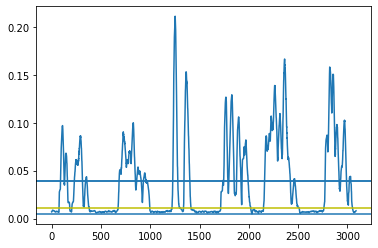

In [6]:

rms_e= librosa.feature.rms(np.abs(aud), hop_length=hl)[0]
s_avg =  np.average(rms_e)
s_mean = np.mean(rms_e)
s_min = np.amin(rms_e)
s_max = np.amax(rms_e)
bins = np.array([0,s_avg])
binned = np.digitize(rms_e,bins)
#plt.figure(figsize=(24,16))
plt.plot(rms_e)
plt.axhline(y=s_mean)
plt.axhline(y=s_avg)
plt.axhline(y=s_min)
plt.axhline(y=s_min+(s_max-s_min)*0.03 , c = 'y')
print(s_avg, s_min, s_max)
#plt.plot(np.array(binned))


In [7]:
all_bits = []
for segment in segments:
    starting = segment[0]
    ending = segment[1]
    #print(starting,ending)
    sec_energy = librosa.feature.rms(np.abs(aud[segment[0]:segment[1]]), hop_length=hop_length)
    #plt.plot(sec_energy)
    segment_boundaries = Split3(aud[starting:ending], hop_length=hl, sr=sr)
    
    for bit in segment_boundaries:
        x1 = starting + bit[0]
        x2 = starting + bit[1]
        b = (x1, x2)
        all_bits.append(b)
#all_bits = Split3(aud, hop_length=hl)
#print(all_bits ,"\n",segments,
print("\n", transcription)
print("\n transcription phonemes: ", len(phonemes), "actual bits: ", len(all_bits) )
trimmed = clip_from_segments(aud, all_bits)
#ipd.Audio(trimmed, rate=sr)
c= 10
bit = all_bits[c]
print(len(all_bits) , len(phonemes), phonemes[c] , all_bits[c] )
ipd.Audio(aud[bit[0]:bit[1]], rate=sr)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [8]:
aud[7650:11340]

array([ 0.00716193,  0.00736288,  0.00651926, ..., -0.00513949,
       -0.00376352, -0.00413457], dtype=float32)

In [6]:
counter = 0
x= exact[counter]
while len(phoneme_sections) ==0:
    transcription = load_clip_transcription(x)
    phonemes = all_phones_to_array(transcription)
    #scan for parameters
    print(x ,counter ,  len(phonemes))
    voiced , phoneme_sections, sr = process_clip(x, len(phonemes))
    counter +=1  
    x= exact[counter]
    print("next",x)
    


E:\Datasets\Voice\LibriSpeech\train-clean-100\1034\121119\1034-121119-0066.flac 0 101
next E:\Datasets\Voice\LibriSpeech\train-clean-100\1034\121119\1034-121119-0074.flac


KeyboardInterrupt: 

In [5]:
counter = 2
x= exact[counter]
transcription = load_clip_transcription(x)
phonemes = all_phones_to_array(transcription)
#scan for parameters
voiced, phoneme_sections, sr = process_clip(x, len(phonemes))
len(phoneme_sections) , counter , x
audio = librosa.load(x, sr)
#phoneme_sections, sr = process_clip(x, len(phonemes))
selection = 7
print(audio[0].shape, phoneme_sections)# , [phoneme_sections[selection][0]:phoneme_sections[selection][1]])

print(phonemes[selection], transcription)
ipd.Audio(audio[0][phoneme_sections[selection][0]-100:phoneme_sections[selection][1]+100], rate= sr)
#ipd.Audio(audio[0][0:31000],rate=sr)
#audio[phoneme_sections[selection][0]: phoneme_sections[selection][1]]
#phoneme_sections= []
#len(audio[0]), sr , x , transcription , len(phonemes)

(255170,) []
uː IT SEEMED TO HER AT LAST THAT SHE WOULD DO WELL TO TAKE A BOOK FORMERLY WHEN HEAVY HEARTED SHE HAD BEEN ABLE WITH THE HELP OF SOME WELL CHOSEN VOLUME TO TRANSFER THE SEAT OF CONSCIOUSNESS TO THE ORGAN OF PURE REASON


IndexError: list index out of range

In [ ]:
#clip_address = known_clips[22]
counter = 0 
exact = []
for x in known_clips:
    
    transcription = load_clip_transcription(x)
    phonemes_in_clip_transcription = all_phones_to_array(transcription)
    
    # not all words are in the dictionary 
    audio = load_clip(x, sr)
    segments = split_into_segments(audio,hop_length, frame_length, sr, min_voiced_duration_ms, energy_threshold)
    ##clip_from_segments(segments)
    phoneme_sections = all_phoneme_Sections_in_clip(audio, segments, sr, frame_length, hop_length, min_duration)
    #print('clip subdivisions: ',len(phoneme_sections), ' transcription phonemes : ' ,len(phonemes_in_clip_transcription))
    #print(len(phonemes_in_clip_transcription))
    #print(phonemes_in_clip_transcription)
    if len(phoneme_sections) ==len(phonemes_in_clip_transcription):
        print(counter , x)
        exact.append(x)
    counter +=1

In [ ]:
print(len(exact))
#np.save("known_clips.npy", np.array(known_clips))
#np.save("exact.npy", np.array(exact))

In [ ]:
audio = load_clip(known_clips[23], sr)
audio.shape
ipd.Audio(audio,rate=sr)
split_into_segments(audio, hop_length, frame_length, sr, min_voiced_duration_ms, energy_threshold)

In [ ]:
## segregate clips with all known words in dictionary 

counter = 0
known_clips = []
##validate data in dictionary
for clip_address in clips:
    try:
        counter +=1
        transcription = load_clip_transcription(clip_address)
        phonemes_in_clip_transcription = all_phones_to_array(transcription)
        if 'XXXXXX' not in phonemes_in_clip_transcription:
            print(counter , clip_address)
            known_clips.append(clip_address)
        else:
            print(counter, " has unknown words ")
    except:
          print("An exception occurred")
np.save("known_clips.npy", np.array(known_clips))

#####################

In [ ]:
features = []
labels = []
for x in exact[0:10]:
    #x =exact[0]
    audio = load_clip(x,sr)
    transcription= load_clip_transcription(x)
    phonemes = all_phones_to_array(transcription)
    segments = split_into_segments(audio, hop_length, frame_length,sr,min_voiced_duration_ms, energy_threshold)
    phoneme_sections = all_phoneme_Sections_in_clip(audio, segments, sr , frame_length, hop_length, min_duration)
    for i in range(len(phoneme_sections)):
        data =np.array([padding(librosa.feature.mfcc(audio[phoneme_sections[i][0]:phoneme_sections[i][1]],
                                                    hop_length=hop_length, sr=sr, n_fft= frame_length),20,60)])
        #data.append([mfcc, phonemes[i]])
        features.append(data)
        labels.append(phonemes[i])
        #adf.append(line)
    
    

In [ ]:
output = np.array(np.concatenate(features, axis=0))
len(labels), len(features) ,features[0].shape,features[1].shape,features[2].shape, features[2].shape
#for x in range(len(features)):
    #print(features[x].shape , labels[x])
features[0].shape[2]
output.shape
#data_con =np.concatenate(np.array(data))[0]

In [ ]:
#Split twice to get the validation set
X_train, X_test, y_train, y_test = train_test_split(output, np.array(labels), test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
#Print the shapes
X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val) 

In [ ]:
input_shape=(20,60)
model = tf.keras.Sequential()
#model.add(LSTM(20,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))
#model.summary()

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [ ]:
model.summary()


In [ ]:
model.fit(X_train,y_train,epochs=50 , batch_size=5, validation_data=(X_val,y_val),shuffle=False, verbose=1)

In [ ]:
np.unique(labels)

In [23]:
#np.save('raw_audio_new.npy', raw_audio)
#np.save('labels_new.npy',labels)
#%%
with open("raw_audio_new.npy", 'rb') as f:
    raw_audio = np.load(f, allow_pickle=True)
with open("labels_new.npy", 'rb') as f:
    labels = np.load(f, allow_pickle=True)
with open("unique_phones.npy", 'rb') as f:
    unique_phones = np.load(f, allow_pickle=True)

In [53]:
c=676
print(unique_phones[labels[c]])
ipd.Audio(raw_audio[c],rate =22000)

uː


In [18]:
raw_audio.shape

(3411,)